In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data

xls_purchase = pd.ExcelFile('Ebuy dataset/Master Data (Purchase).xlsx')
xls_sales = pd.ExcelFile('Ebuy dataset/Master Data (Sales).xlsx')
xls_sold = pd.ExcelFile("Ebuy dataset/SPU_sales_converted.xlsx")

In [3]:
# Get the particular outlet data

def getSales(sale_page):
    sales = pd.read_excel(xls_sales,sale_page)
    sales.drop(['Product - English Name','Product - Chinese Name'],axis = 1, inplace = True)
    sales['Date of Sale'] = pd.to_datetime(sales['Date of Sale'])
    return sales 


def getPurchase(purchase_page):
    purchases = pd.read_excel(xls_purchase,purchase_page)
    purchases.drop(['Product Name - English','Product Name - Chinese','Quantity of Order Received'], axis = 1, inplace = True)
    purchases['Date of Purchase'] = pd.to_datetime(purchases['Date of Purchase'])
    return purchases 


def getSold(sold_page):
    sold = pd.read_excel(xls_sold,sold_page)
    sold.drop(["Unnamed: 0"],axis=1, inplace = True)
    sold['Date of Sale'] = pd.to_datetime(sold['Date of Sale'])
    sold.rename(columns = {"Date of Sale": "Date"},inplace = True)
    return sold 

In [4]:
# Combine sales and purchase

def combine(n):#outlet number
    sales = getSales("Sales - Outlet "+str(n))
    purchases = getPurchase("Purchase - Outlet "+ str(n))

    # Change to pivot table
    sales.rename(columns = {"Date of Sale": "Date"},inplace = True)
    sales['Day'] = sales['Date'].dt.strftime('%a')
    sales = sales.pivot(index="Date", columns = ["SKU"], values = "Amount Sold")

    purchases.rename(columns = {"Date of Purchase": "Date"},inplace = True)
    purchases['Day'] = purchases['Date'].dt.strftime('%a')
    purchases = purchases.pivot(index="Date", columns = ['SKU'], values = "Quantity of Order Placed")
    
    merged = sales.merge(purchases, on="Date")
    merged = merged.replace(np.nan,0)
    df1 = merged.index
    df1 = pd.DataFrame(df1)
    df1["Days"] = df1['Date'].dt.strftime('%a')
    merged = df1.merge(merged, on ="Date")
    return merged

# Combine sold and purchase
def combine2(n):
    sold = getSold("SPU - Outlet "+str(n))
    purchases = getPurchase("Purchase - Outlet "+ str(n))

    
    sold = sold.pivot(index="Date", columns = ["SPU"], values = "Amount Sold")

    purchases.rename(columns = {"Date of Purchase": "Date"},inplace = True)
    purchases['Day'] = purchases['Date'].dt.strftime('%a')
    purchases = purchases.pivot(index="Date", columns = ['SKU'], values = "Quantity of Order Placed")

    merged = sold.merge(purchases, on="Date")
    merged = merged.replace(np.nan,0)

    # add day
    df1 = merged.index
    df1 = pd.DataFrame(df1)
    df1["Days"] = df1['Date'].dt.strftime('%a')
    merged = df1.merge(merged, on ="Date")

    return merged

<AxesSubplot:>

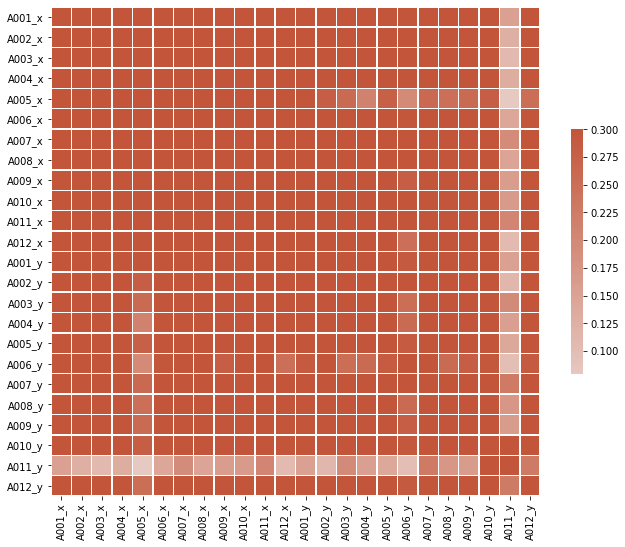

In [5]:
c2 = combine2(1)

corr = c2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

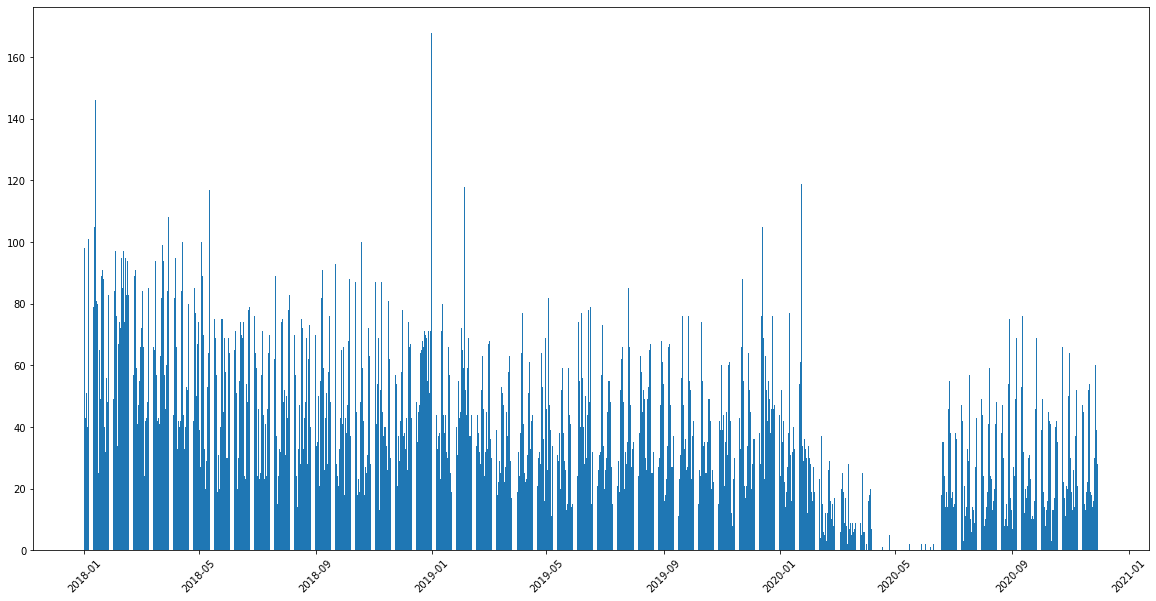

In [13]:
# plot the bar of a particular ingredient purchases or sold throughout the time

def plot_bar(dataframe,SKU):
    plt.figure(figsize=(20,10))
    plt.bar(dataframe["Date"],dataframe[SKU])
    # dataframe = dataframe.sort_values(by='Date of Purchase')
    # plt.plot(dataframe.sort_values(by="Date of Purchase")["Date of Purchase"],dataframe['Quantity of Order Placed'],'-r')
    plt.xticks(rotation=45)
    plt.show()
plot_bar(c2, "A001_x")